# Loan Delinquency Prediction

Loan default prediction is one of the most critical and crucial problem faced by financial institutions and organizations as it has a noteworthy effect on the profitability of these institutions. In recent years, there is a tremendous increase in the volume of non – performing loans which results in a jeopardizing effect on the growth of these institutions.
 
<br>

Therefore, to maintain a healthy portfolio, the banks put stringent monitoring and evaluation measures in place to ensure timely repayment of loans by borrowers. Despite these measures, a major proportion of loans become delinquent. Delinquency occurs when a borrower misses a payment against his/her loan.

<br>
 

Given the information like mortgage details, borrowers related details and payment details, our objective is to identify the delinquency status of loans for the next month given the delinquency status for the previous 12 months (in number of months)

##      Data Dictionary


|Variable						|Description												|
|-------------------------------|-----------------------------------------------------------|		
|loan_id						|Unique loan ID 											|		
|source							|Loan origination channel 									|		
|financial_institution			|Name of the bank 											|		
|interest_rate					|Loan interest rate 										|		
|unpaid_principal_bal			|Loan unpaid principal balance								|			
|loan_term						|Loan term (in days)										|		
|origination_date				|Loan origination date										|		
|first_payment_date				|First instalment payment date								|				
|loan_to_value					|Loan to value ratio										|		
|number_of_borrowers			|Number of borrowers										|		
|debt_to_income_ratio			|Debt-to-income ratio										|		
|borrower_credit_score			|Borrower credit score										|		
|loan_purpose					|Loan purpose												
|insurance_percent				|Loan Amount percent covered by insurance								|
|co-borrower_credit_score		|Co-borrower credit score												|
|insurance_type					|0 - Premium paid by borrower, 1 - Premium paid by Lender				|
|m1 to m12						|Month-wise loan performance (deliquency in months)						|
|m13							|target, loan deliquency status (0 = non deliquent, 1 = deliquent)		|



**test.zip** . 

test.zip contains test.csv which has details of all loans for which the participants are to submit the delinquency status - 0/1 (not probability)
 
**Evaluation Metric** 

Submissions are evaluated on F1-Score between the predicted class and the observed target.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split, StratifiedKFold

# XGBoost
import xgboost as xgb

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.metrics import confusion_matrix

# date-time manipulation
from datetime import datetime

# SMOTE / Imbalance dataset handling
from imblearn.over_sampling import SMOTE

# Ignore only Future and Deprecation warnings

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Path of Dataset

DATASET_AND_OUTPUT_PATH = "./"
TRAIN_DATASET_NAME = "train.csv"
TEST_DATASET_NAME = "test.csv"

# Read dataset and do basic data exploration

In [3]:
train_df = pd.read_csv(DATASET_AND_OUTPUT_PATH + TRAIN_DATASET_NAME)
test_df = pd.read_csv(DATASET_AND_OUTPUT_PATH + TEST_DATASET_NAME)

print("Shape of train set", train_df.shape,
      "\nShape of test set ", test_df.shape)

Shape of train set (116058, 29) 
Shape of test set  (35866, 28)


In [4]:
# Check both the datatypes and if there is missing values

print(f"Data types:\n{11 * '-'}")
print(f"{train_df.dtypes}\n")
print(f"Sum of null values in each feature (train_df):\n{45 * '-'}")
print(f"{train_df.isnull().sum()}")
print(f"Sum of null values in each feature (test_df):\n{45 * '-'}")
print(f"{test_df.isnull().sum()}")
train_df.head()

Data types:
-----------
loan_id                       int64
source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12 

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [5]:
# List down all column names

print(train_df.columns.to_list())

['loan_id', 'source', 'financial_institution', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13']


In [6]:
# Describe train and test datasets
train_df.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [7]:
test_df.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000,35866.000000
mean,17933.500000,3.872850,207764.846930,293.130123,67.388334,1.596805,30.762867,769.926504,2.729409,462.436681,0.003178,0.002844,0.002314,0.001952,0.002007,0.002705,0.002370,0.003374,0.003680,0.004322,0.005548,0.006162,0.007333
std,10353.766714,0.460537,114561.745828,89.298799,17.246741,0.490546,9.726146,41.779664,8.029155,381.314899,0.056289,0.060600,0.058991,0.056838,0.059238,0.071770,0.066958,0.086539,0.092898,0.099676,0.121322,0.141455,0.160602
min,1.000000,2.375000,15000.000000,60.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8967.250000,3.500000,119000.000000,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17933.500000,3.875000,182000.000000,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,742.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26899.750000,4.125000,278000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35866.000000,6.625000,802000.000000,360.000000,97.000000,2.000000,55.000000,839.000000,35.000000,832.000000,1.000000,3.000000,4.000000,5.000000,5.000000,6.000000,6.000000,7.000000,5.000000,6.000000,7.000000,8.000000,9.000000


# Create baseline models using only numeric data

In [8]:
train_df.dtypes.value_counts()

int64      17
float64     7
object      5
dtype: int64

In [9]:
# create a dataframe with numeric features only
train_df_numeric = train_df.select_dtypes(include=[np.number]).copy()

In [10]:
train_df_numeric.dtypes.value_counts()

int64      17
float64     7
dtype: int64

## Define a binary classification evaluation function

In [11]:
def evalBinaryClassifier(model, y_test_pred, y, labels=['Positives', 'Negatives']):
    '''
    Visualize the performance of  a  Binary Classifier.

    Displays a labelled Confusion Matrix, distributions of the predicted
    probabilities for both classes, and F1 score of a fitted
    Binary Logistic Classifier. Author: gregcondit.com/articles/logr-charts

    Parameters
    ----------
    model : fitted scikit-learn model with predict_proba & predict methods
        and classes_ attribute.

    x : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples
        in the data to be tested, and n_features is the number of features

    y : array-like, shape (n_samples,)
        Target vector relative to x.

    labels: list, optional
        list of text labels for the two classes, with the positive label first

    Displays
    ----------
    2 Subplots

    Returns
    ----------
    F1: float
    '''
    # model predicts probabilities of positive class
    p = y_test_pred

    if len(model.classes_) != 2:
        raise ValueError('A binary class problem is required')
        
    if model.classes_[1] == 1:
        #print("Model's class 1 is 1")
        pos_p = p[:, 1]
    elif model.classes_[0] == 1:
        #print("Model's class 0 is 1")
        pos_p = p[:, 0]
    
#    print("\n\n")
    
    # FIGURE
    plt.figure(figsize=[15, 4])

    # 1 -- Confusion matrix
    cm = confusion_matrix(y, np.argmax(y_test_pred, axis=1))
    plt.subplot(121)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
                     annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
                'False Negatives', 'True Positives']
    for i, t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)

    # 2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos': pos_p, 'target': y})
    plt.subplot(122)
    plt.hist(df[df.target == 1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[1])
    plt.hist(df[df.target == 0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[0])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0, 1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")


    # Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,6)} | '
        f'Recall: {round(recall,6)} | '
        f'F1 Score: {round(F1,6)} | '
    )
    print(printout)
    print("\n\n")
    print(f"classification_report:\n{22 * '-'}")
    print(classification_report(y_test, np.argmax(
        y_test_pred, axis=1), target_names=labels))
    print(f"matthews_corrcoef:", matthews_corrcoef(
        y_test, np.argmax(y_test_pred, axis=1)))
    plt.show()

    return F1

## Using Logistic Regression

Baseline models using only numeric data (Logistic Regression):
---------------------------------------------------------------
Precision: 0.044159 | Recall: 0.709497 | F1 Score: 0.083142 | 



classification_report:
----------------------
               precision    recall  f1-score   support

non-deliquent       1.00      0.92      0.96     34639
    deliquent       0.04      0.71      0.08       179

     accuracy                           0.92     34818
    macro avg       0.52      0.82      0.52     34818
 weighted avg       0.99      0.92      0.95     34818

matthews_corrcoef: 0.16370722399380128


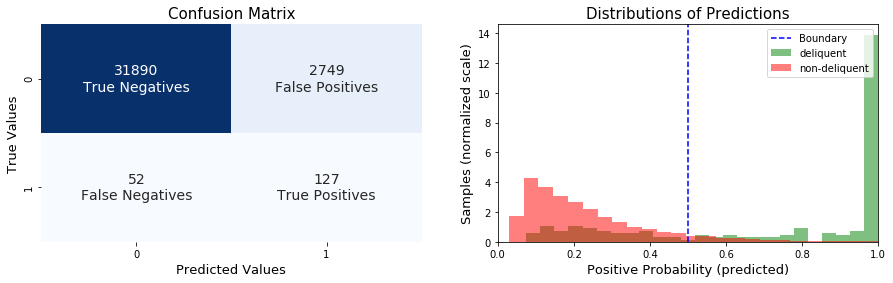

0.08314238952536825

In [12]:
# Create baseline with only numeric parameters Logistic Regression model

X, y = train_df_numeric.drop("m13", axis="columns"), train_df_numeric["m13"]

X_train, X_test, y_train, y_test = train_test_split(
    X.drop(["loan_id"], axis="columns"), y, test_size=0.3, random_state=123)

clf_LR = LogisticRegression(class_weight="balanced")

clf_LR.fit(X_train, y_train)

LR_Predict = clf_LR.predict_proba(X_test)
LR_Predict_bin = clf_LR.predict(X_test)

print(f"Baseline models using only numeric data (Logistic Regression):\n{63 * '-'}")
evalBinaryClassifier(clf_LR, LR_Predict, y_test, labels=['non-deliquent', 'deliquent'])

In [13]:
# Predict results on test_df and submit score

outputBLR = test_df[['loan_id']].copy()
test_df_numeric = test_df.select_dtypes(include=[np.number]).copy()

outputBLR['m13'] = clf_LR.predict(
    test_df_numeric.drop(["loan_id"], axis="columns"))
outputBLR.head(2)

,loan_id,m13
0,1,0
1,2,0


## Write test predicted values to submission file

In [14]:
# Uncomment if we need Baseline results with LR

# outputBLR.to_csv(DATASET_AND_OUTPUT_PATH +
#                 "BL-LogisticRegression-Only-Numeric-Data.csv", index=False)

## Using XGB Classifier

Baseline models using only numeric data (xgb classifier):
---------------------------------------------------------------
Precision: 0.810811 | Recall: 0.335196 | F1 Score: 0.474308 | 



classification_report:
----------------------
               precision    recall  f1-score   support

non-deliquent       1.00      1.00      1.00     34639
    deliquent       0.81      0.34      0.47       179

     accuracy                           1.00     34818
    macro avg       0.90      0.67      0.74     34818
 weighted avg       1.00      1.00      1.00     34818

matthews_corrcoef: 0.5199093939601206


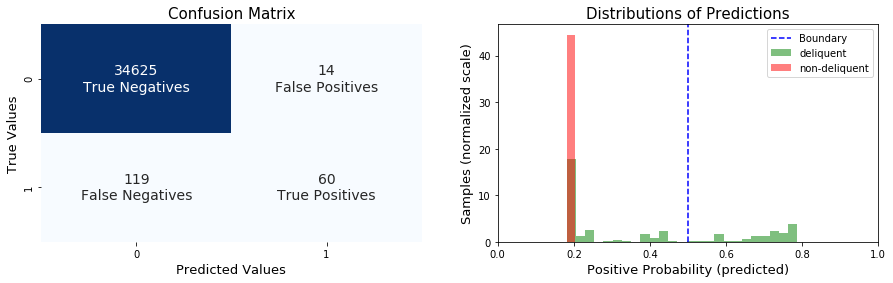

0.4743083003952569

In [15]:
# Create baseline with only numeric parameters using XGBoost model

X, y = train_df_numeric.drop("m13", axis="columns"), train_df_numeric["m13"]

X_train, X_test, y_train, y_test = train_test_split(
    X.drop(["loan_id"], axis="columns"), y, test_size=0.3, random_state=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                          n_estimators=10, seed=123)

xg_cl.fit(X_train, y_train)

preds = xg_cl.predict_proba(X_test)

print(f"Baseline models using only numeric data (xgb classifier):\n{63 * '-'}")
evalBinaryClassifier(xg_cl, preds, y_test, labels=['non-deliquent', 'deliquent'])

In [16]:
# Predict results on test_df and submit score
output = test_df[['loan_id']].copy()
test_df_numeric = test_df.select_dtypes(include=[np.number]).copy()
output['m13'] = xg_cl.predict(
    test_df_numeric.drop(["loan_id"], axis="columns"))
output.head(2)

,loan_id,m13
0,1,0
1,2,0


In [17]:
# Uncomment if we need Baseline results with XGB

# Result on PublicLB : 0.231707317073171
# output.to_csv(DATASET_AND_OUTPUT_PATH +
#              "BL-XGBoost-Only-Numeric-Data.csv", index=False)

# Results are better with xgb, so we will be trying xgb further as first choice.

### LIst down all object type feature and convert them to numeric features

In [18]:
train_df.select_dtypes(include=["object"]).head()

,source,financial_institution,origination_date,first_payment_date,loan_purpose
0,Z,"Turner, Baldwin and Rhodes",2012-03-01,05/2012,C86
1,Y,"Swanson, Newton and Miller",2012-01-01,03/2012,B12
2,Z,Thornton-Davis,2012-01-01,03/2012,B12
3,X,OTHER,2012-02-01,04/2012,B12
4,X,OTHER,2012-02-01,04/2012,C86


In [19]:
test_df.select_dtypes(include=["object"]).head()

,source,financial_institution,origination_date,first_payment_date,loan_purpose
0,Y,Browning-Hart,01/02/12,Apr-12,A23
1,X,OTHER,01/02/12,Apr-12,C86
2,Y,OTHER,01/01/12,Mar-12,C86
3,X,"Miller, Mcclure and Allen",01/02/12,Apr-12,A23
4,X,Browning-Hart,01/02/12,Apr-12,A23


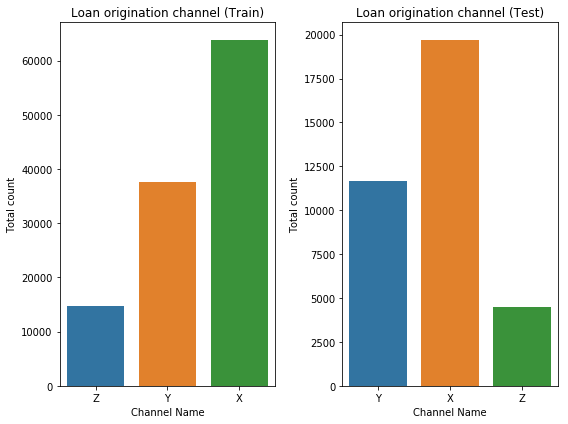

In [20]:
fig, axarr = plt.subplots(ncols=2, figsize=(8, 6))

g1 = sns.countplot(x="source", data=train_df, ax=axarr[0])
g1.set(xlabel='Channel Name', ylabel='Total count',
       title='Loan origination channel (Train)')

g2 = sns.countplot(x="source", data=test_df, ax=axarr[1])
g2.set(xlabel='Channel Name', ylabel='Total count',
       title='Loan origination channel (Test)')
fig.tight_layout()
plt.show()

In [21]:
train_df[["source","m13"]].pivot_table(index="source", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
source,,
X,63553,305
Y,37307,247
Z,14562,84


In [22]:
test_df["source"].value_counts()

X    19714
Y    11653
Z     4499
Name: source, dtype: int64

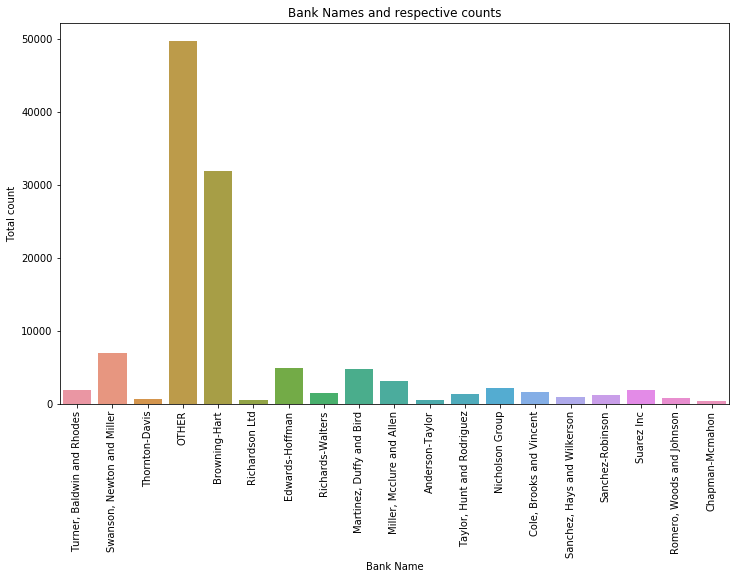

In [23]:
# Set the width and height of the figure

plt.figure(figsize=(12, 7))
g = sns.countplot(x="financial_institution", data=train_df)
g = plt.setp(g.get_xticklabels(), rotation=90)
plt.title("Bank Names and respective counts")
plt.xlabel("Bank Name")
plt.ylabel("Total count")
plt.show()

In [24]:
train_df[["financial_institution","m13"]].pivot_table(index="financial_institution", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
financial_institution,,
Anderson-Taylor,480,3
Browning-Hart,31677,175
Chapman-Mcmahon,388,0
"Cole, Brooks and Vincent",1630,12
Edwards-Hoffman,4816,41
"Martinez, Duffy and Bird",4692,23
"Miller, Mcclure and Allen",3139,19
Nicholson Group,2105,11
OTHER,49430,269


In [25]:
test_df['financial_institution'].value_counts()

OTHER                          15162
Browning-Hart                  10078
Swanson, Newton and Miller      2095
Edwards-Hoffman                 1530
Martinez, Duffy and Bird        1448
Miller, Mcclure and Allen        912
Nicholson Group                  596
Suarez Inc                       586
Turner, Baldwin and Rhodes       542
Cole, Brooks and Vincent         492
Richards-Walters                 462
Taylor, Hunt and Rodriguez       397
Sanchez-Robinson                 384
Sanchez, Hays and Wilkerson      289
Romero, Woods and Johnson        241
Thornton-Davis                   216
Richardson Ltd                   170
Anderson-Taylor                  152
Chapman-Mcmahon                  114
Name: financial_institution, dtype: int64

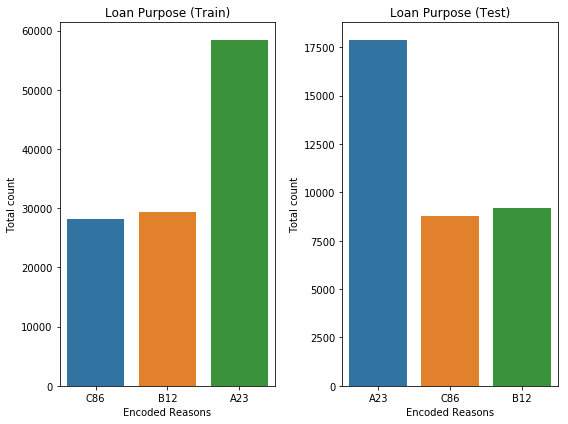

In [26]:
fig, axarr = plt.subplots(ncols=2, figsize=(8, 6))

g1 = sns.countplot(x="loan_purpose", data=train_df, ax=axarr[0])
g1.set(xlabel='Encoded Reasons', ylabel='Total count',
       title='Loan Purpose (Train)')

g2 = sns.countplot(x="loan_purpose", data=test_df, ax=axarr[1])
g2.set(xlabel='Encoded Reasons', ylabel='Total count',
       title='Loan Purpose (Test)')
fig.tight_layout()
plt.show()

In [27]:
train_df[["loan_purpose","m13"]].pivot_table(index="loan_purpose", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
loan_purpose,,
A23,58251,211
B12,29164,219
C86,28007,206


In [28]:
print(test_df["loan_purpose"].value_counts())

A23    17892
B12     9197
C86     8777
Name: loan_purpose, dtype: int64


## Feature Engineering  

Create dummy features out of 'source', "financial_institution' and 'loan_purpose'

In [29]:
# Create dummy variables from the feature purpose

train_df = pd.get_dummies(train_df, columns=["source", "financial_institution", "loan_purpose"], prefix=[
                          "source", "fi", "loanpurpose"], drop_first=True)
test_df = pd.get_dummies(test_df, columns=["source", "financial_institution", "loan_purpose"], prefix=[
                         "source", "fi", "loanpurpose"], drop_first=True)

In [30]:
# Convert date to the datetime object

train_df["origination_date"] = pd.to_datetime(train_df["origination_date"])
test_df["origination_date"] = pd.to_datetime(test_df["origination_date"])

train_df["first_payment_date"] = pd.to_datetime(train_df["first_payment_date"])
test_df["first_payment_date"] = test_df["first_payment_date"].apply(
    lambda x: pd.to_datetime(datetime.strptime(x, "%b-%y")).date())
test_df["first_payment_date"] = test_df["first_payment_date"].astype(
    np.datetime64)

In [31]:
# Verify above two steps

train_df.head(2)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z,fi_Browning-Hart,fi_Chapman-Mcmahon,"fi_Cole, Brooks and Vincent",fi_Edwards-Hoffman,"fi_Martinez, Duffy and Bird","fi_Miller, Mcclure and Allen",fi_Nicholson Group,fi_OTHER,fi_Richards-Walters,fi_Richardson Ltd,"fi_Romero, Woods and Johnson","fi_Sanchez, Hays and Wilkerson",fi_Sanchez-Robinson,fi_Suarez Inc,"fi_Swanson, Newton and Miller","fi_Taylor, Hunt and Rodriguez",fi_Thornton-Davis,"fi_Turner, Baldwin and Rhodes",loanpurpose_B12,loanpurpose_C86
0,268055008619,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,672831657627,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [32]:
test_df.head(2)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,source_Y,source_Z,fi_Browning-Hart,fi_Chapman-Mcmahon,"fi_Cole, Brooks and Vincent",fi_Edwards-Hoffman,"fi_Martinez, Duffy and Bird","fi_Miller, Mcclure and Allen",fi_Nicholson Group,fi_OTHER,fi_Richards-Walters,fi_Richardson Ltd,"fi_Romero, Woods and Johnson","fi_Sanchez, Hays and Wilkerson",fi_Sanchez-Robinson,fi_Suarez Inc,"fi_Swanson, Newton and Miller","fi_Taylor, Hunt and Rodriguez",fi_Thornton-Davis,"fi_Turner, Baldwin and Rhodes",loanpurpose_B12,loanpurpose_C86
0,1,3.875,417000,360,2012-01-02,2012-04-01,75,1,20,790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4.500,113000,360,2012-01-02,2012-04-01,80,2,33,793,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
print(f"Train data types:\n{20 * '-'}")
print(train_df.dtypes.value_counts())
print(f"Test data types:\n{20 * '-'}")
print(test_df.dtypes.value_counts())

Train data types:
--------------------
uint8             22
int64             17
float64            7
datetime64[ns]     2
dtype: int64
Test data types:
--------------------
uint8             22
int64             22
datetime64[ns]     2
float64            1
dtype: int64


In [34]:
print("Shape of train set",train_df.shape,"\nShape of test set ",test_df.shape)

Shape of train set (116058, 48) 
Shape of test set  (35866, 47)


## Review target feature "m13" distribution

In [35]:
# Get number of loan deliquency status

deliquent = train_df[train_df["m13"] == 1].shape[0]
not_deliquent = train_df[train_df["m13"] == 0].shape[0]

print(f"Deliquent examples = {deliquent}")
print(f"Not deliquent examples = {not_deliquent}")
print(
    f"Proportion of deliquent to not deliquent examples = {(deliquent / not_deliquent) * 100:.2f}%")

Deliquent examples = 636
Not deliquent examples = 115422
Proportion of deliquent to not deliquent examples = 0.55%


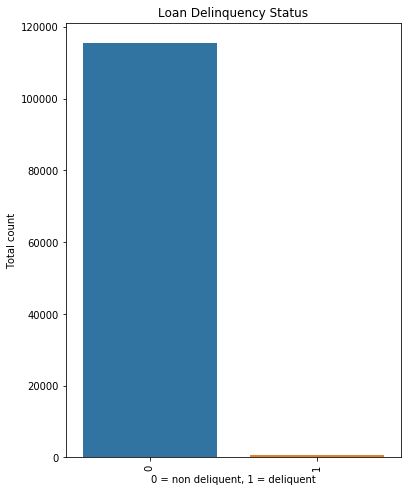

In [36]:
# Set the width and height of the figure
plt.figure(figsize=(6, 8))
g = sns.countplot(x="m13", data=train_df)
g = plt.setp(g.get_xticklabels(), rotation=90)
plt.title("Loan Delinquency Status")
plt.xlabel("0 = non deliquent, 1 = deliquent")
plt.ylabel("Total count")
plt.show()

# Based on above result, dataset is Highly Imbalanced.

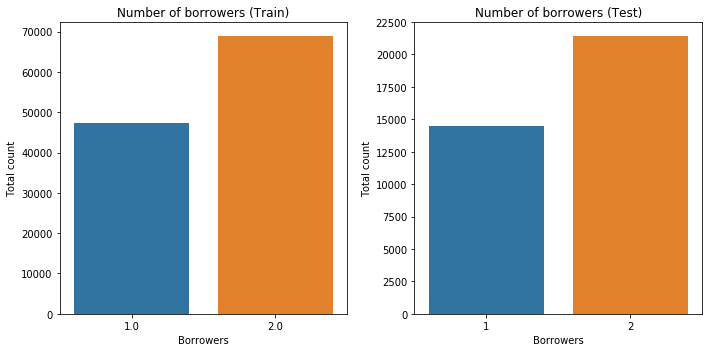

In [37]:
# Analyze number of borrower's distribution for train and test set

fig, axarr = plt.subplots(ncols=2, figsize=(10, 5))

g1 = sns.countplot(x="number_of_borrowers", data=train_df, ax=axarr[0])
g1.set(xlabel='Borrowers', ylabel='Total count',
       title='Number of borrowers (Train)')

g2 = sns.countplot(x="number_of_borrowers", data=test_df, ax=axarr[1])
g2.set(xlabel='Borrowers', ylabel='Total count',
       title='Number of borrowers (Test)')
fig.tight_layout()
plt.show()

In [38]:
train_df[["insurance_type","m13"]].pivot_table(index="insurance_type", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
insurance_type,,
0.0,115049,631
1.0,373,5


In [39]:
print(test_df["insurance_type"].value_counts())

0    35752
1      114
Name: insurance_type, dtype: int64


### Create a new feature credit_score based on borrower_credit_score, number_of_borrowers and co-borrower_credit_score. In case of co-borrowers, lowest score will be counted.

In [40]:
train_df["credit_score"] = 0
test_df["credit_score"] = 0


def fill_credit_score(row):
    if (row["number_of_borrowers"] == 2):
        if (row["borrower_credit_score"] <= row["co-borrower_credit_score"]):
            return row["borrower_credit_score"]
        else:
            return row["co-borrower_credit_score"]
    else:
        return row["borrower_credit_score"]


train_df["credit_score"] = train_df.apply(fill_credit_score, axis="columns")
test_df["credit_score"] = test_df.apply(fill_credit_score, axis="columns")

In [41]:
# delete "borrower_credit_score","co-borrower_credit_score" as we have already created a new feature "credit_Score"

train_df = train_df.drop(
    columns=["borrower_credit_score", "co-borrower_credit_score"], axis="columns")
test_df = test_df.drop(
    columns=["borrower_credit_score", "co-borrower_credit_score"], axis="columns")

In [42]:
# Verification
#test_df[test_df["number_of_borrowers"] == 2][["borrower_credit_score","co-borrower_credit_score","credit_score"]].head(5)

In [43]:
# We will be using this generic function for Binning:
def binning(col, cut_points, labels=None):
    # Define min and max values:
    minval = col.min()
    maxval = col.max()

    # create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

    # if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points) + 1)

    # Binning using cut function of pandas
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
    return colBin

### Create bins for credit_score as per below information

- no_score 0-299
- very_poor 300-579
- fair 580-669
- good 670-739
- very_good 740-799
- exceptional 800-

In [44]:
cut_points = [299, 579, 669, 739, 799]
labels = ["no_score", "very_poor", "fair", "good", "very_good", "exceptional"]

train_df["credit_score_bin"] = binning(
    train_df["credit_score"], cut_points, labels)
test_df["credit_score_bin"] = binning(
    test_df["credit_score"], cut_points, labels)

In [45]:
# Verification
# train_df[train_df["credit_score"] <= 579][["credit_score","credit_score_bin"]]
# test_df[test_df["credit_score"] > 669][["credit_score","credit_score_bin"]]
# s = test_df["credit_score_bin"].dtype

In [46]:
# Since there is an implicit order among bins, so use Ordinal Encoding for credit score

enc = OrdinalEncoder(
    categories=[list(train_df["credit_score_bin"].dtype.categories.array)])
train_df["credit_score_enc"] = enc.fit_transform(
    np.array(train_df["credit_score_bin"]).reshape(-1, 1))
test_df["credit_score_enc"] = enc.transform(
    np.array(test_df["credit_score_bin"]).reshape(-1, 1))

In [47]:
# Delete "credit_score_bin"

train_df = train_df.drop(
    columns=["credit_score_bin", "credit_score"], axis="columns")
test_df = test_df.drop(
    columns=["credit_score_bin", "credit_score"], axis="columns")

In [48]:
train_df[["credit_score_enc","m13"]].pivot_table(index="credit_score_enc", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
credit_score_enc,,
0.0,94,0
1.0,0,1
2.0,3159,158
3.0,23534,268
4.0,66096,177
5.0,22539,32


In [49]:
print(test_df["credit_score_enc"].value_counts())

4.0    20688
3.0     7358
5.0     6765
2.0     1031
0.0       24
Name: credit_score_enc, dtype: int64


In [50]:
train_df.head(2)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z,fi_Browning-Hart,fi_Chapman-Mcmahon,"fi_Cole, Brooks and Vincent",fi_Edwards-Hoffman,"fi_Martinez, Duffy and Bird","fi_Miller, Mcclure and Allen",fi_Nicholson Group,fi_OTHER,fi_Richards-Walters,fi_Richardson Ltd,"fi_Romero, Woods and Johnson","fi_Sanchez, Hays and Wilkerson",fi_Sanchez-Robinson,fi_Suarez Inc,"fi_Swanson, Newton and Miller","fi_Taylor, Hunt and Rodriguez",fi_Thornton-Davis,"fi_Turner, Baldwin and Rhodes",loanpurpose_B12,loanpurpose_C86,credit_score_enc
0,268055008619,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,30.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0
1,672831657627,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3.0


In [51]:
train_df[(train_df["interest_rate"] > 5) & (train_df["m13"] == 1)].shape[0]

26

In [52]:
test_df["interest_rate"].describe()

count    35866.000000
mean         3.872850
std          0.460537
min          2.375000
25%          3.500000
50%          3.875000
75%          4.125000
max          6.625000
Name: interest_rate, dtype: float64

### There are many interest rates used in dataset. Generally Interest rates are dependent on many parameters of borrowers like Income, credit score etc, so I want to create an Ordinal ranking among interest rate. Bins are created based on data analyis and intituition. 

In [53]:
# Binning interest_rate:

cut_points = [2.49, 2.99, 3.49, 3.99, 4.24, 4.49, 4.99]
labels = ["intL1", "intL2", "intL3", "intL4",
          "intL5", "intL6", "intL7", "intL8"]

train_df["interest_rate_bin"] = binning(
    train_df["interest_rate"], cut_points, labels)
test_df["interest_rate_bin"] = binning(
    test_df["interest_rate"], cut_points, labels)

# Ordinal Encoding for credit score
enc = OrdinalEncoder(
    categories=[list(train_df["interest_rate_bin"].dtype.categories.array)])
train_df["interest_rate_enc"] = enc.fit_transform(
    np.array(train_df["interest_rate_bin"]).reshape(-1, 1))
test_df["interest_rate_enc"] = enc.transform(
    np.array(test_df["interest_rate_bin"]).reshape(-1, 1))

# Lets also delete "interest_rate_bin"
train_df = train_df.drop(
    columns=["interest_rate_bin", "interest_rate"], axis="columns")
test_df = test_df.drop(
    columns=["interest_rate_bin", "interest_rate"], axis="columns")

In [54]:
train_df[["interest_rate_enc","m13"]].pivot_table(index="interest_rate_enc", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
interest_rate_enc,,
0.0,8,0
1.0,2279,5
2.0,23086,39
3.0,41561,140
4.0,22985,121
5.0,14862,133
6.0,9258,158
7.0,1383,40


In [55]:
print(test_df["interest_rate_enc"].value_counts())

3.0    12837
4.0     7146
2.0     7064
5.0     4732
6.0     2960
1.0      708
7.0      418
0.0        1
Name: interest_rate_enc, dtype: int64


In [56]:
train_df.head()

,loan_id,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z,fi_Browning-Hart,fi_Chapman-Mcmahon,"fi_Cole, Brooks and Vincent",fi_Edwards-Hoffman,"fi_Martinez, Duffy and Bird","fi_Miller, Mcclure and Allen",fi_Nicholson Group,fi_OTHER,fi_Richards-Walters,fi_Richardson Ltd,"fi_Romero, Woods and Johnson","fi_Sanchez, Hays and Wilkerson",fi_Sanchez-Robinson,fi_Suarez Inc,"fi_Swanson, Newton and Miller","fi_Taylor, Hunt and Rodriguez",fi_Thornton-Davis,"fi_Turner, Baldwin and Rhodes",loanpurpose_B12,loanpurpose_C86,credit_score_enc,interest_rate_enc
0,268055008619,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,30.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,5.0
1,672831657627,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3.0,6.0
2,742515242108,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4.0,2.0
3,601385667462,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,6.0
4,273870029961,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,3.0,6.0


### Observed a specific pattern with first payment date and delinquence status, so capturing the same using specfic ordinal encoding

In [57]:
train_df["first_payment_date"].unique()

array(['2012-05-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [58]:
train_df[["first_payment_date","m13"]].pivot_table(index="first_payment_date", columns="m13", 
                        aggfunc=len, fill_value=0)

m13,0,1
first_payment_date,,
2012-02-01,518,6
2012-03-01,47384,296
2012-04-01,52560,280
2012-05-01,14960,54


In [59]:
print(test_df["first_payment_date"].value_counts())

2012-04-01    16551
2012-03-01    14661
2012-05-01     4510
2012-02-01      144
Name: first_payment_date, dtype: int64


### Maximum delinquenct loans have their first payment date as 2012-03-01 followed by 2012-04-01, 2012-05-01 and 2012-02-01, so  I will be creating ordinal encoding in same fashion.

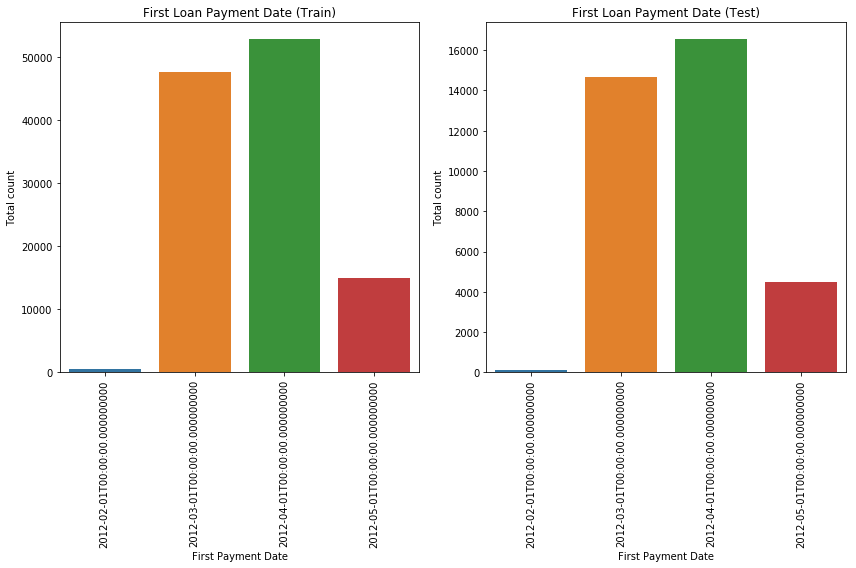

In [60]:
fig, axarr = plt.subplots(ncols=2, figsize=(12, 8))
g1 = sns.countplot(x="first_payment_date", data=train_df, ax=axarr[0])
g1.set(xlabel='First Payment Date', ylabel='Total count',
       title='First Loan Payment Date (Train)')
g1 = plt.setp(g1.get_xticklabels(), rotation=90)

g2 = sns.countplot(x="first_payment_date", data=test_df, ax=axarr[1])
g2.set(xlabel='First Payment Date', ylabel='Total count',
       title='First Loan Payment Date (Test)')
g2 = plt.setp(g2.get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

In [61]:
test_df["first_payment_date"].unique()

array(['2012-04-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [62]:
# Ordinal encoding without sklearn for first_payment_date

def change_fpd_ordinal_encoding(row):
  # print(row["first_payment_date"])
  if (row["first_payment_date"] == datetime(2012, 2, 1)):
    return 1
  elif (row["first_payment_date"] == datetime(2012, 5, 1)):
    return 2
  elif (row["first_payment_date"] == datetime(2012, 4, 1)):
    return 3
  elif (row["first_payment_date"] == datetime(2012, 3, 1)):
    return 4
 
train_df['fpd_cat'] = train_df.apply(change_fpd_ordinal_encoding, axis="columns")
test_df['fpd_cat'] = test_df.apply(change_fpd_ordinal_encoding, axis="columns")

In [63]:
train_df.head(2)

,loan_id,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,insurance_percent,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_Y,source_Z,fi_Browning-Hart,fi_Chapman-Mcmahon,"fi_Cole, Brooks and Vincent",fi_Edwards-Hoffman,"fi_Martinez, Duffy and Bird","fi_Miller, Mcclure and Allen",fi_Nicholson Group,fi_OTHER,fi_Richards-Walters,fi_Richardson Ltd,"fi_Romero, Woods and Johnson","fi_Sanchez, Hays and Wilkerson",fi_Sanchez-Robinson,fi_Suarez Inc,"fi_Swanson, Newton and Miller","fi_Taylor, Hunt and Rodriguez",fi_Thornton-Davis,"fi_Turner, Baldwin and Rhodes",loanpurpose_B12,loanpurpose_C86,credit_score_enc,interest_rate_enc,fpd_cat
0,268055008619,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,30.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3.0,5.0,2
1,672831657627,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3.0,6.0,4


# Model builiding using K-Fold cross validation with SMOTE and XGBoost

Length of X (train): 81240 | Length of y (train): 81240
Length of X (test): 34818 | Length of y (test): 34818
---------------------------------------------------------------------------------------------------------------------------------------
Precision: 0.557377 | Recall: 0.534031 | F1 Score: 0.545455 | 



classification_report:
----------------------
               precision    recall  f1-score   support

non-deliquent       1.00      1.00      1.00     34627
    deliquent       0.56      0.53      0.55       191

     accuracy                           1.00     34818
    macro avg       0.78      0.77      0.77     34818
 weighted avg       1.00      1.00      1.00     34818

matthews_corrcoef: 0.5431268389587073


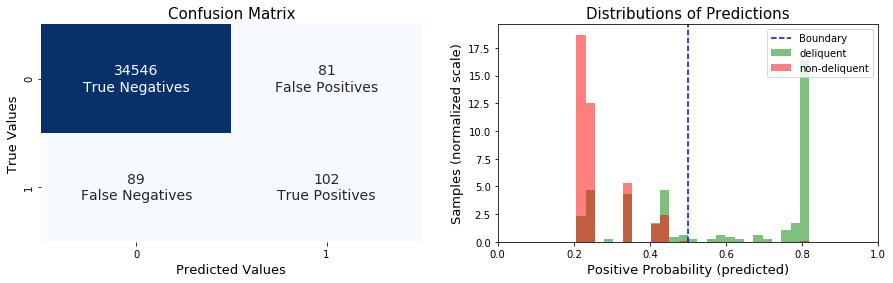

---------------------------------------------------------------------------------------------------------------------------------------
Classification Report (with threshold probability as 0.502) :
------------------------------------------------------------
[[34550    77]
 [   89   102]]
---------------------------------------------------------------------------------------------------------------------------------------


In [64]:
# We will be using 5-Fold stratified cross validation with SMOTE and XGB

# Number of folds
num_of_folds = 5

skf = StratifiedKFold(n_splits=num_of_folds, random_state=2019, shuffle=True)

X, y = train_df.drop("m13", axis="columns").copy(), train_df["m13"].copy()

# Do train-test split using stratify option. Test size is 30%
X_train, X_test, y_train, y_test = train_test_split(X.drop(["loan_id", "origination_date", "first_payment_date"], axis="columns"), y,
                                                    test_size=0.3, random_state=2019, stratify=y)

# SMOTE with xgBoost Classifier

print("Length of X (train): {} | Length of y (train): {}".format(
    len(X_train), len(y_train)))
print("Length of X (test): {} | Length of y (test): {}".format(
    len(X_test), len(y_test)))

# New variables to hold validation and test results
y_test_pred = np.zeros((y_test.shape[0], 2))
output_pred = np.zeros((test_df.shape[0], 2))

# Classifier with optimal parameters

xg_classifier_sm = xgb.XGBClassifier(
    objective="binary:logistic", n_estimators=10, seed=123)


# Implementing SMOTE Technique with Cross Validating the right way

for train, test in skf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..

    smt = SMOTE(random_state=2019)
    train_X, train_y = smt.fit_sample(X_train.iloc[train], y_train.iloc[train])

    model = xg_classifier_sm.fit(train_X, train_y)
    prediction = xg_classifier_sm.predict(X_train.iloc[test].values)

    # Predict test data
    smote_prediction = xg_classifier_sm.predict_proba(X_test.values)
    # print(smote_prediction)
    y_test_pred += smote_prediction

    output = xg_classifier_sm.predict_proba(test_df.drop(
        ["loan_id", "origination_date", "first_payment_date"], axis="columns").values)
    output_pred += output


print("---" * 45)

# Average test and validation data as we have sum up all "num_of_folds" folds
y_test_pred /= num_of_folds
output_pred /= num_of_folds

# Evaluate the validation results
evalBinaryClassifier(xg_classifier_sm, y_test_pred, y_test, labels=["non-deliquent", "deliquent"])

# Change probability threshold, to see if we can get better results :)

pred_adj = (y_test_pred[:, 1] >= 0.502).astype("int")
print("---" * 45)
print(
    f'Classification Report (with threshold probability as 0.502) :\n{60 * "-"}')
print(confusion_matrix(y_test, pred_adj))
print("---" * 45)
adj_output_pred = (output_pred[:, 1] >= 0.502).astype("int")

# Copy output data to file
output = test_df[["loan_id"]].copy()
output["m13"] = adj_output_pred

# Result on PublicLB : 0.33980582524271846
output.to_csv(DATASET_AND_OUTPUT_PATH +
              "SMOTE-XGB-Basic-no-hypertuning-0.502-Final.csv", index=False)

## Show feature importance graph

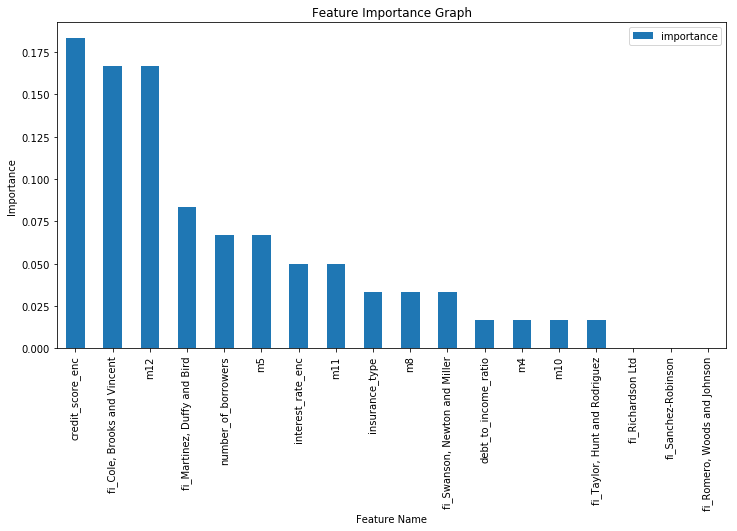

In [65]:
feature_cols = X_test.columns
importance = pd.DataFrame(
    {"feature": feature_cols[:], "importance": xg_classifier_sm.feature_importances_[:]}
)
importance.sort_values(
    by="importance",
    axis=0,
    ascending=False,
    inplace=True,
    kind="quicksort",
    na_position="last",
)
importance[:18].plot(x="feature", y="importance", kind="bar", figsize=(12, 6))
plt.title("Feature Importance Graph")
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.show()

### Key takeaways

- Domain knowledge is very important, if not aware,  read about all the features before starting the problem.
- Feature engineering is key, don’t underestimate it. Trust your instinct and try different encoding schemes.
- Never ignore nitty-gritty of features e.g. if we want to create a new feature “credit_score”  from features like “borrower_credit_score” and “co-borrower_credit_score”, we need to choose the lowest score among them.  In a joint loan, financial institutes always consider lower credit score among them for loan approval.
- It is very important to have a communication channel with Data Engineers or stake holders responsible for business to understand any doubt with respect to data. E.g. It is not clear how "m1" is aligned with "origination_date" or "first_payment_date". Loans with "loan_term" less than 6 months with 0 loan delinquency between m1-m12 will always have m13 as 0. So those rows can be treated differently. 